In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
# from wordcloud import WordCloud
import seaborn as sns
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors

In [5]:
df = pd.read_csv('indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [7]:
df.shape
df.info()
df.describe()
df.isnull().sum()
print(df.region.unique())
df.fillna(value= '-1', inplace = True)  #all null values are replaced with the -1 (for preprocessing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB
['East' 'West' 'North' '-1' 'North East' 'South' 'Central' nan]


In [9]:
# getting the number of all rows in data frame
len(df)

c = []
for i in range(len(df)) :
    if df.loc[i, 'region'] == '-1' :
        c.append(df.name.loc[i])
print(c)

['Kaju katli', 'Kheer', 'Laddu', 'Nankhatai', 'Khichdi', 'Kulfi falooda', 'Lauki ki subji', 'Pani puri', 'Panjeeri', 'Papad', 'Samosa', 'Upma', 'Brown Rice', 'Red Rice']


In [11]:
# replacing the the value of -1 with unknown in region column
df.region.replace(['-1'], 'unknown', regex = True, inplace = True)

In [13]:
# getting the all ingredient_counts
l = []
for i in range(len(df)) :
    y = df.ingredients.loc[i]
    y_ = y.split(sep = ',')
    l.append(len(y_))
df['total_ingredients'] = pd.Series(l)

print(df['total_ingredients'])

0       4
1       3
2       6
3      10
4       8
       ..
250     3
251     4
252     5
253     4
254     5
Name: total_ingredients, Length: 255, dtype: int64


In [15]:
# we get the all flavour which has unkonwn values
flavor = []
for i in range(len(df)) :
    if df.flavor_profile.loc[i] == '-1' :
        flavor.append(df.name.loc[i])
print(flavor)

['Chapati', 'Naan', 'Rongi', 'Kanji', 'Pachadi', 'Paniyaram', 'Paruppu sadam', 'Puli sadam', 'Puttu', 'Sandige', 'Sevai', 'Thayir sadam', 'Theeyal', 'Bhakri', 'Copra paak', 'Dahi vada', 'Dalithoy', 'Kansar', 'Farsi Puri', 'Khar', 'Luchi', 'Bengena Pitika', 'Bilahi Maas', 'Black rice', 'Brown Rice', 'Chingri Bhape', 'Pakhala', 'Pani Pitha', 'Red Rice']


In [17]:
# replacing the missing values in prep_time columns with the average of all values which are present in the dataframe
df.prep_time.replace(-1, df.prep_time.median(), regex = True, inplace = True)

# replacing the missing values in cook_time columns with the average of all values which are present in the dataframe
df.cook_time.replace(-1, df.cook_time.median(), regex = True, inplace = True)

# replacing the missing values in flavor_profile columns with unique
df.flavor_profile.replace('-1', 'unique', regex = True, inplace = True)

# replacing the missing values in state columns with unknown
df.state.replace('-1', 'unknown', regex = True, inplace = True)

# unique
df.flavor_profile.unique()

array(['sweet', 'spicy', 'bitter', 'unique', 'sour'], dtype=object)

In [19]:
# printing that data frame first 10 rows
df.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,8
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East,2
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North,9
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,unknown,unknown,4
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East,3
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,unknown,unknown,4


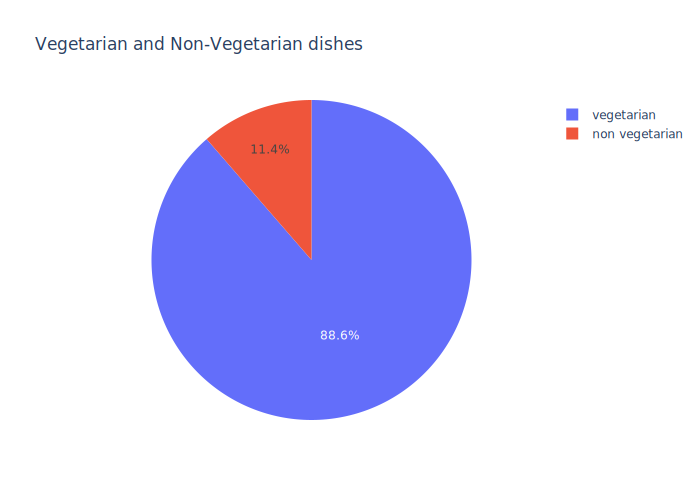

In [21]:
new_df = df['diet'].value_counts().reset_index()
new_df.columns = ['Diet', 'Total']

import plotly.express as px
import kaleido

fig = px.pie(new_df, values='Total', names='Diet', title='Vegetarian and Non-Vegetarian dishes')

fig.show("svg")

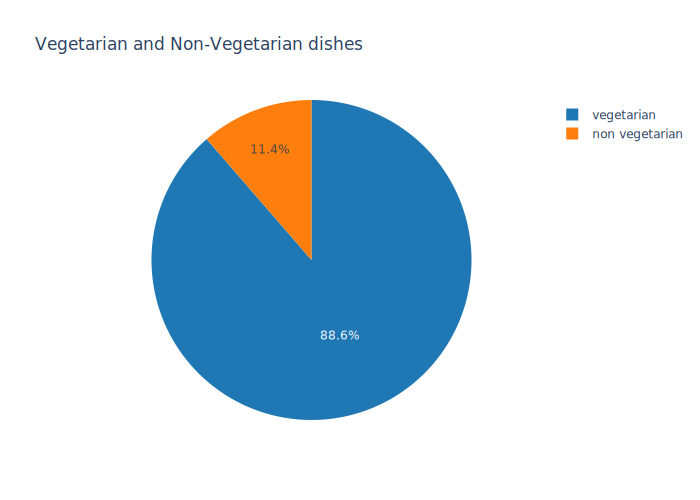

In [25]:
# as per the data frame now we are planning to create some charts which are pie and bar
import plotly.express as px

def plotting_graph(category, value_x, value_y, name, title, color):
 
    new_df = df[name].value_counts().reset_index()
    new_df.columns = [value_x, 'Total']

    custom_color_palette = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
    ]

    if category == 'scatter':
        fig = px.scatter(new_df, values='Total', names=value_x, title=title,
                     color_discrete_sequence=custom_color_palette,
                     hover_data=[value_x, 'Total'])  # Set hover_data for continuous tooltips
    elif category == 'bar':
        fig = px.bar(new_df, y='Total', x=value_x, title=title,
                     color_discrete_sequence=custom_color_palette,
                     hover_data=[value_x, 'Total'])  # Set hover_data for continuous tooltips
    elif category == 'pie':
         fig = px.pie(new_df, values='Total', names=value_x, title=title,
                     color_discrete_sequence=custom_color_palette,
                     hover_data=[value_x, 'Total'])  # Set hover_data for continuous tooltips
    elif category == 'bar_2_axis':
         fig = px.bar(new_df, x=value_x, y=value_y, color="medal", title="Long-Form Input") # Set hover_data for continuous tooltips

    return fig.show("svg")

# Example usage
plotting_graph('pie', 'Diet', None, 'diet', 'Vegetarian and Non-Vegetarian dishes', None,)

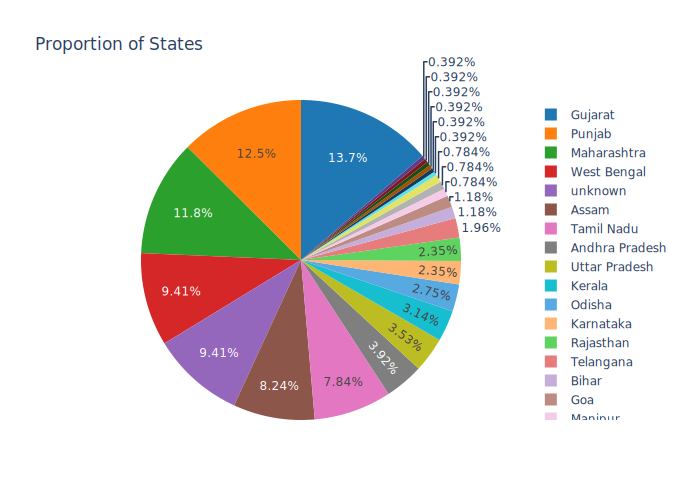

In [27]:
plotting_graph('pie', 'State', None, 'state', 'Proportion of States', 'Rainbow')

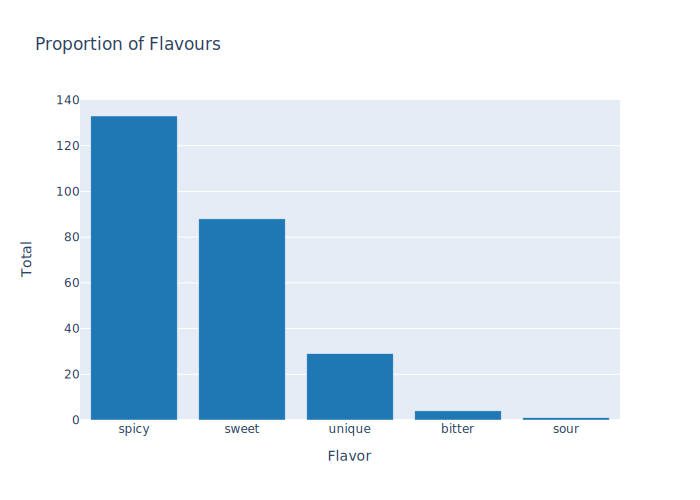

In [29]:
plotting_graph('bar', 'Flavor', None, 'flavor_profile', 'Proportion of Flavours', None)

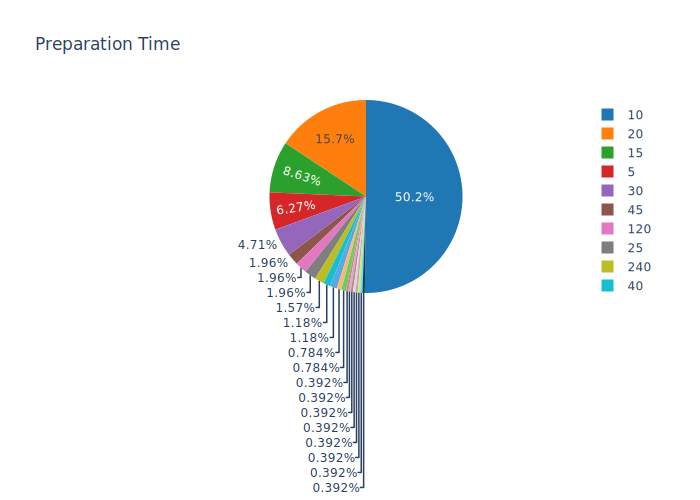

In [31]:
plotting_graph('pie', 'Preparetion Time', None, 'prep_time', 'Preparation Time', None)

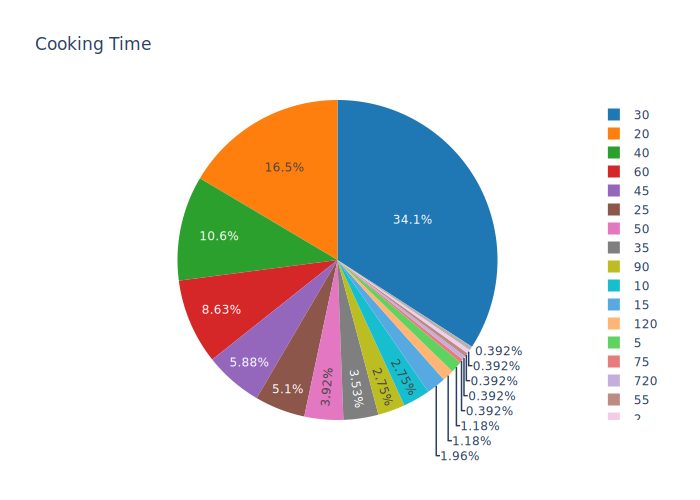

In [33]:
plotting_graph('pie', 'Cook Time', None, 'cook_time', 'Cooking Time', None)

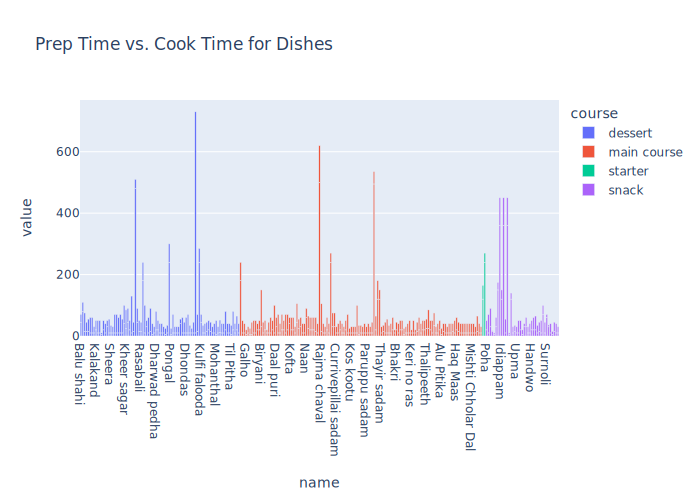

In [35]:
# preparation vs cook time as par the State

fig = px.bar(df, x='name', y=['prep_time', 'cook_time'], color='course', title='Prep Time vs. Cook Time for Dishes')

fig.show("svg")

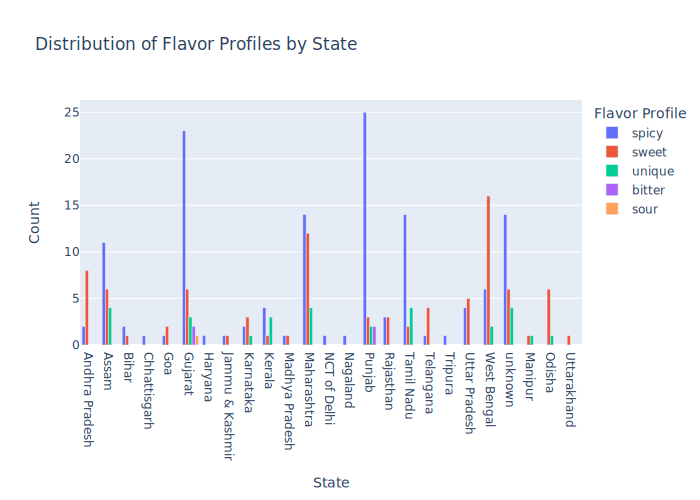

In [37]:
# Distribution of Flavor Profiles by State
flavor_profile_state_counts = df.groupby(['state', 'flavor_profile']).size().reset_index(name='count')

fig = px.bar(flavor_profile_state_counts,
             x='state', 
             y='count', 
             color='flavor_profile', 
             barmode='group',
             title='Distribution of Flavor Profiles by State')

fig.update_layout(xaxis_title='State', 
                  yaxis_title='Count', 
                  legend_title='Flavor Profile')

fig.show("svg")

In [39]:
def state_infograph(statename, title) :
    dish = df[df['state']== statename]

    total_dishes = dish.shape[0]

    category_dish = dish['course'].value_counts().reset_index()
    category_dish.columns = ['course','num']

    diet_dish = dish['diet'].value_counts().reset_index()
    diet_dish.columns = ['diet','num']

    flavor_dish = dish['prep_time'].value_counts().reset_index()
    flavor_dish.columns = ['Flavor','num']

    prep_time_dish = dish['prep_time'].value_counts().reset_index()
    prep_time_dish.columns = ['prep_time', 'num']

    fig = make_subplots(
        rows=2, cols=3,subplot_titles=('Total Dishes','Dishes by Category','Dishes as per Preparation time', '',''),
        specs=[[{'type': 'indicator'},{'type': 'bar','rowspan': 2},{'type': 'bar','rowspan': 2}],
              [ {'type': 'pie'} , {'type': 'pie'}, {'type': 'pie'}]])

    fig.add_trace(go.Indicator(
        mode = 'number',
        value = int(total_dishes),
        number={'font':{'color': '#270082','size':50}},
    ),row=1, col=1)


    fig.add_trace(go.Bar(x=category_dish['course'],y=category_dish['num'], marker={'color': 'yellow'},
                         text=category_dish['num'],name='dishes by courses',textposition ='auto'),row=1, col=2)

    fig.add_trace(go.Pie(labels=diet_dish['diet'], values=diet_dish['num'],textinfo='percent',
                         marker= dict(colors=['#00bd0d','#1cbab5'])),row=2, col=1)

    fig.add_trace(go.Bar(
        x=prep_time_dish['prep_time'],y=category_dish['num'],marker={'color': '#1cbab5'}, text=category_dish['num'],
        name='flavors by courses',textposition ='auto'),row=1, col=3)

    fig.update_layout(title_text= title,template='plotly',title_x=0.5)

    return fig.show("svg")

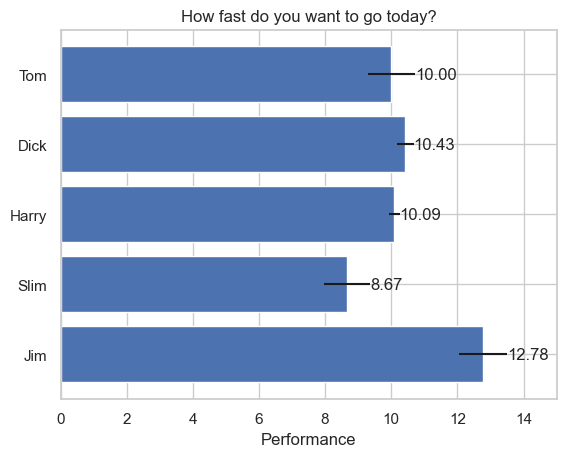

In [41]:
np.random.seed(19680801)

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show("svg")

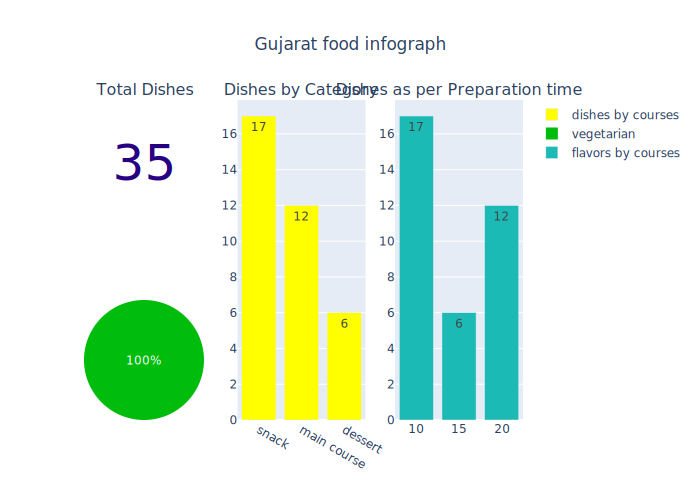

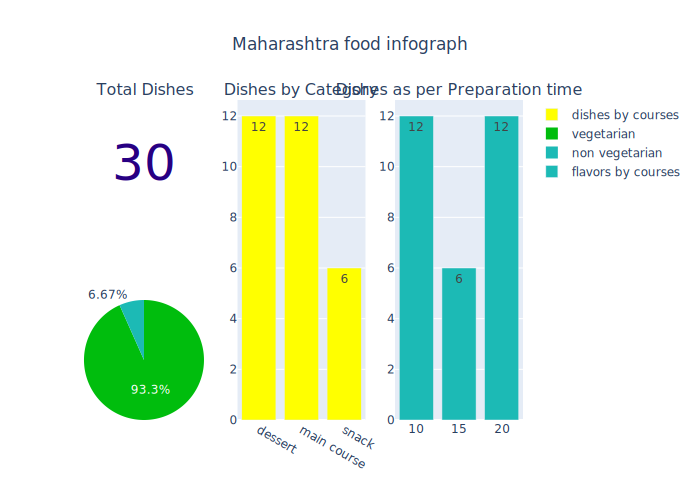

In [43]:
state_infograph('Gujarat', 'Gujarat food infograph')
state_infograph('Maharashtra', 'Maharashtra food infograph')

In [47]:
def bar_plot_plotly(type_, name, color, title):
    new_df_plotly = df[df.course == type_]
    new_df_plotly = new_df_plotly.sort_values(by=name)

    # Choose a shinier color sequence
    shiny_color_sequence = px.colors.qualitative.Set1

    if color == 'Viridis_r':
        fig = px.bar(new_df_plotly.tail(10), x='name', y=name, color='name',
                     color_discrete_sequence=shiny_color_sequence, title=title)
    elif color == 'Plasma_r':
        fig = px.bar(new_df_plotly.tail(10), x='name', y=name, color='name',
                     color_discrete_sequence=shiny_color_sequence, title=title)
    elif color == 'matter_r':
        fig = px.bar(new_df_plotly.tail(10), x='name', y=name, color='name',
                     color_discrete_sequence=shiny_color_sequence, title=title)
    else:
        fig = px.bar(new_df_plotly.tail(10), x='name', y=name, color='name', title=title)

    return fig.show("svg")

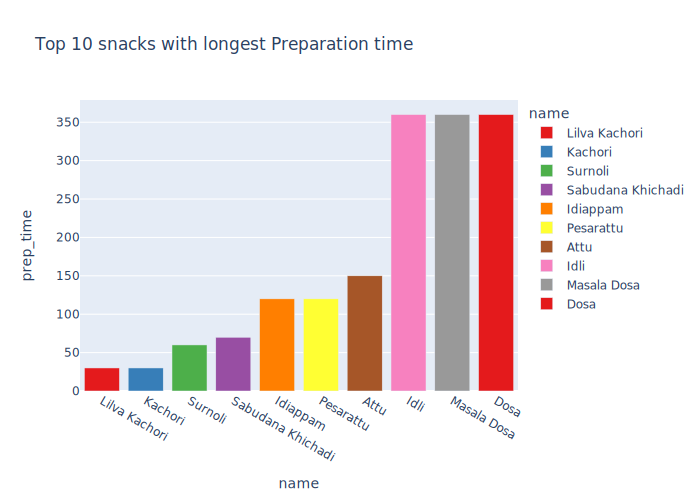

In [49]:
bar_plot_plotly('snack','prep_time','Viridis_r', 'Top 10 snacks with longest Preparation time')

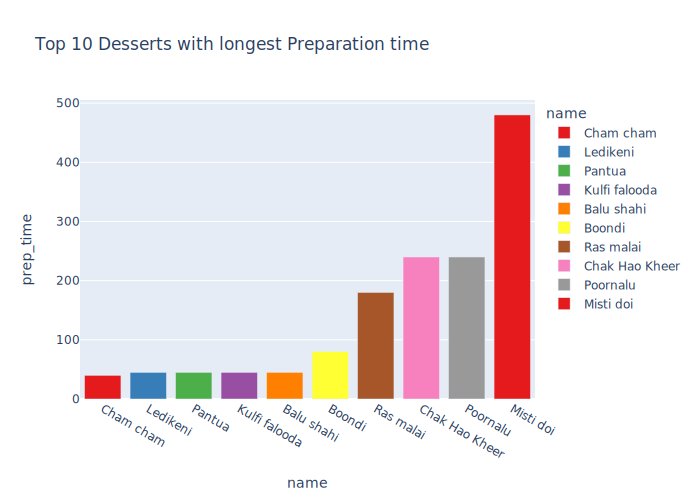

In [51]:
bar_plot_plotly('dessert','prep_time', 'Plasma_r', 'Top 10 Desserts with longest Preparation time')

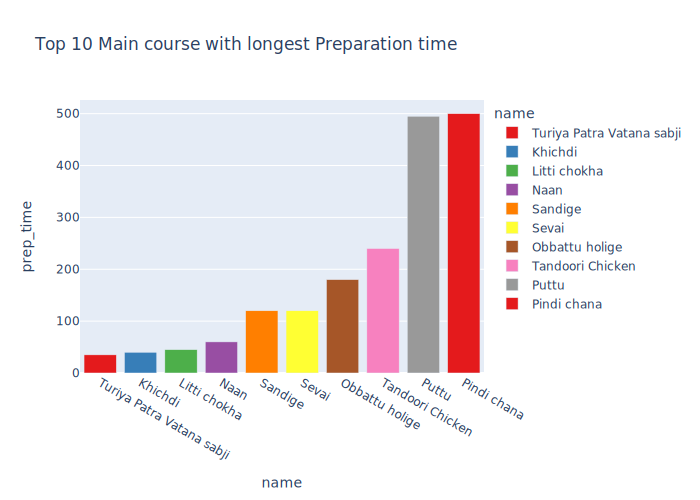

In [53]:
bar_plot_plotly('main course','prep_time', 'matter_r', 'Top 10 Main course with longest Preparation time')

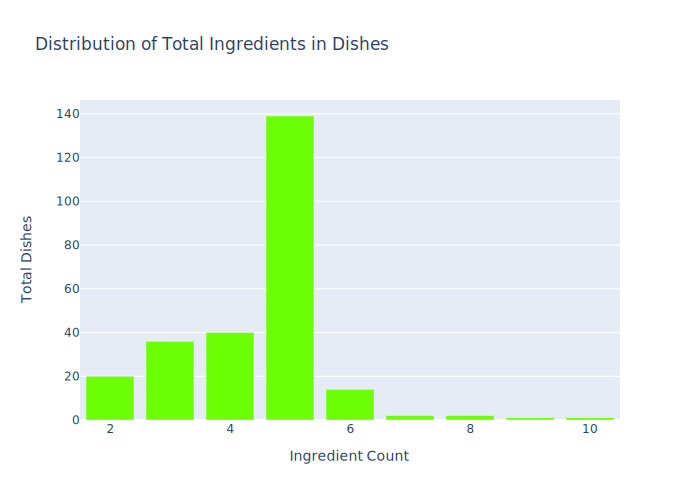

In [55]:
# Count occurrences of each total ingredient count in the dataset
ingredient_df = df['total_ingredients'].value_counts().reset_index()

# Rename columns for clarity in the plot
ingredient_df.columns = ['Ingredient Count', 'Total Dishes']

# Create a bar plot using Plotly Express
fig = px.bar(ingredient_df, y='Total Dishes', x='Ingredient Count', title='Distribution of Total Ingredients in Dishes',
             color_discrete_sequence=['#6dff05'])
# Show the plot
fig.show("svg")

In [57]:
from collections import Counter

# Concatenate all ingredients into a single list
all_ingredients = [ingredient.strip() for sublist in df['ingredients'].str.split(',') for ingredient in sublist]

# Use Counter to count occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)

# Retrieve the top 50 most used ingredients
top_50_ingredients = dict(sorted(ingredient_counts.items(), key=lambda x: x[1], reverse=True)[:50])

# Print or use top_50_ingredients as needed
print(top_50_ingredients)

{'sugar': 44, 'ginger': 29, 'garam masala': 27, 'ghee': 25, 'curry leaves': 25, 'jaggery': 20, 'urad dal': 17, 'Rice flour': 16, 'milk': 15, 'tomato': 15, 'garam masala powder': 12, 'mustard oil': 12, 'Chana dal': 11, 'sesame seeds': 11, 'saffron': 10, 'turmeric': 10, 'coconut': 10, 'Whole wheat flour': 10, 'clarified butter': 9, 'cardamom': 9, 'gram flour': 9, 'mustard seeds': 9, 'lemon juice': 8, 'garlic': 8, 'potato': 8, 'Urad dal': 8, 'baking soda': 7, 'Rice': 7, 'salt': 7, 'Wheat flour': 7, 'tomatoes': 7, 'butter': 7, 'all purpose flour': 7, 'Moong dal': 7, 'bengal gram flour': 7, 'grated coconut': 7, 'raisins': 6, 'curd': 6, 'Milk': 6, 'Chhena': 6, 'cream': 6, 'semolina': 6, 'chillies': 6, 'kasuri methi': 6, 'cashew nuts': 6, 'green chili': 6, 'lemon': 6, 'gur': 6, 'oil': 5, 'nuts': 5}


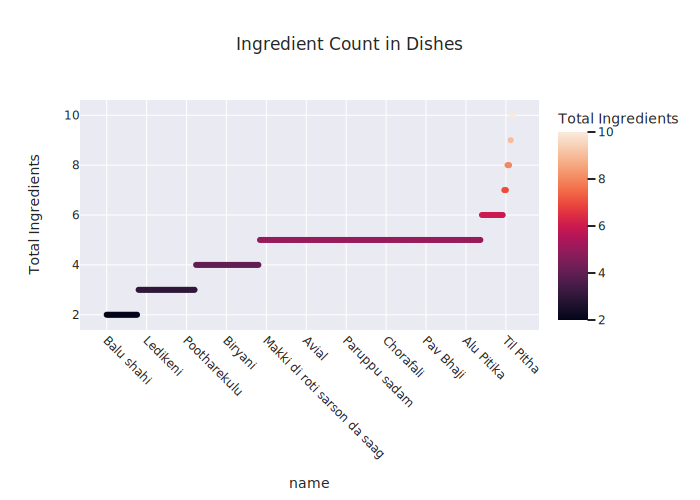

In [59]:
fig = px.scatter(df.sort_values(by='total_ingredients'),
                 x='name',
                 y='total_ingredients',
                 color='total_ingredients',
                 labels={'total_ingredients': 'Total Ingredients'},
                 title="Ingredient Count in Dishes",
                 template='seaborn',)

fig.update_xaxes(tickangle=45, tickmode='array', tickvals=list(range(0, len(df), int(len(df)/10))), ticktext=df['name'][::int(len(df)/10)])

fig.show("svg")

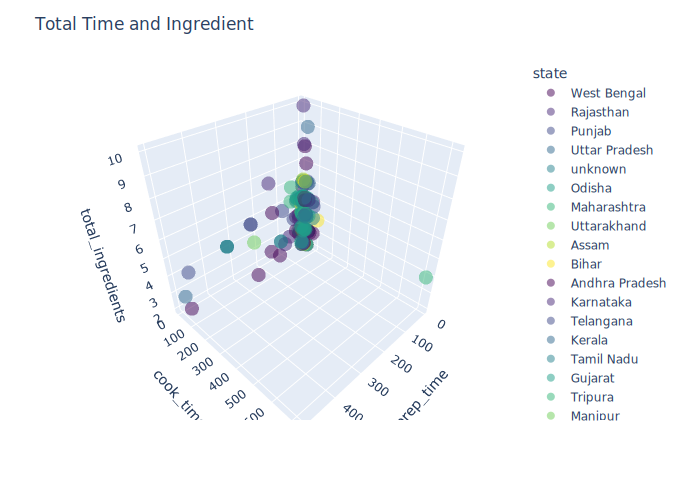

In [61]:
fig = px.scatter_3d(df, x='prep_time', y='cook_time', z='total_ingredients',
                    color='state',
                    hover_data=['name'],
                    opacity=0.5,
                    color_discrete_sequence=px.colors.sequential.Viridis)  # Change to your desired color sequence

fig.update_layout(title='Total Time and Ingredient')
fig.show("svg")